In [2]:
## 20231020 Load and Read vdif data from Kalyani to test DNS daq system

##From loadD3Adata_Dallas.py:
from matplotlib.pyplot import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
import numpy as np
import h5py
##From WT:
import os
import glob
from matplotlib import colors
import pandas
import csv
import pickle
%matplotlib inline

# Display settings:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Kalyani's Import Statements:
import baseband
import astropy.units as u
import glob
import os
import time
import numpy as np
import baseband
from baseband import vdif
import astropy.units as u
from astropy.time import Time
import h5py
import matplotlib.pylab as plt
import numpy.ma as ma
from matplotlib.offsetbox import AnchoredText
import math
import psutil

In [2]:
vdifdir='/Volumes/EXTRSSD/vdif/20240229T232354Z_wvu_raw/'
workingdir='/Users/kalyanibhopi94/Documents/kalyanib_dns/vdif_dns_data'
os.chdir(vdifdir)
files = np.sort(glob.glob('*.vdif'))
os.chdir(workingdir)
print("There are {} files in the V_dif acquisition.".format(len(files)))

# if our 1024 samples (@400MHz) are every 256 microsec, sample_rate should be (400/1024) MHz:
print('sample_rate = {} MHz'.format(400/1024))

There are 50 files in the V_dif acquisition.
sample_rate = 0.390625 MHz


In [3]:
n_files=36
#load and read file, assign dd as the voltage array:
dd=np.NAN*np.ones((n_files,65536,2,1024)).astype(np.complex64)
tt=0.000256*np.arange(int(n_files*65536))
for k in range(n_files):
    ff=baseband.vdif.open(vdifdir+files[k], 'rs', sample_rate=0.390625*u.MHz)
    dd[k,:,:,:]=ff.read(65536)
dd=dd.reshape((int(n_files*65536),2,1024))

In [4]:
dd[0:2343750,:,:].shape

(2343750, 2, 1024)

In [ ]:
def crosscorr(x,y,chan_ind,freq_ind):
    return np.fft.ifft(np.fft.fft(x[:,chan_ind,freq_ind])*np.conj(np.fft.fft(y[:,chan_ind,freq_ind])))

In [ ]:
#WT -- do not run this 
def Plot_Correlations(vddata,plotfreqs, tbds=[0,-1]):
    fig,axes=subplots(nrows=2,ncols=4,figsize=(18,8))
    colorsarr=cm.gnuplot2(np.linspace(0,1,1026))
    tmin,tmax=[0,65536*n_files]
    tmin1,tmax1=tbds
    #loop 1: i either channel 0 or 1 for auto/cross correlation product #1
    for i in [0,1]:
        #loop 2: j either channel 0 or 1 for auto/cross correlation product #2
        for j in [0,1]:
            ax1=axes[i][j]
            ax2=[axes[i][2],axes[i][3]][j]
            #loop 3: k is the frequency bin we want to check... do the correlations and ffts here:
            #for k in np.arange(10,1024,203):
            for k in plotfreqs: 
                ax1.plot(np.real(np.fft.ifft(np.fft.fft(vddata[tmin:tmax,i,k])*np.conj(np.fft.fft(vddata[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k],label='real ind={}'.format(k))
                ax1.plot(np.imag(np.fft.ifft(np.fft.fft(vddata[tmin:tmax,i,k])*np.conj(np.fft.fft(vddata[tmin:tmax,j,k])))),'x',alpha=0.25,c=colorsarr[k],label='imag ind={}'.format(k))
                ax2.plot(np.abs(np.fft.ifft(np.fft.fft(vddata[tmin:tmax,i,k])*np.conj(np.fft.fft(vddata[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k],label='abs {}x{} ind={}'.format(i,j,k))
                plt.yscale("log") #plotting y-axis in log scale
            for axi in [ax1,ax2]:
                axi.set_title('{}x{}'.format(i,j))
                axi.set_xlabel('time index')
                axi.set_ylabel('$abs(ifft(fft[{}]fft[{}^*]))$'.format(i,j))
                axi.legend(loc=1,fontsize='x-small')
                axx=axi.twiny()
                axx.set_xlim(axi.get_xlim())
                axx.set_xlabel('time [s]')
                axx.set_xticks(axi.get_xticks()[1:-1])
                axx.set_xticklabels(["{:.2f}".format(0.00000256*k)for k in axi.get_xticks()[1:-1]])
    tight_layout()

In [5]:
#KBB

def Plot_Correlations(vddata,plotfreqs, tbds=[0,-1]):
    fig,axes=subplots(nrows=6,ncols=2,figsize=(14,25))
    colorsarr=cm.gnuplot2(np.linspace(0,1,1026))
    #tmin,tmax=[0,65536*n_files]
    tmin,tmax=[0,2343750] # 6 seconds
    #tmin,tmax=[0,1953125] # 5 seconds 
    tmin1,tmax1=tbds
    #loop 1: i either channel 0 or 1 for auto/cross correlation product #1
    for i in [0,1]:
        #loop 2: j either channel 0 or 1 for auto/cross correlation product #2
        for j in [0,1]:
            ax1=axes[i][j]
            ax2=[axes[2][i],axes[3][i]][j]
            ax3=[axes[4][i],axes[5][i]][j]
            #loop 3: k is the frequency bin we want to check... do the correlations and ffts here:
            #for k in np.arange(10,1024,203):
            for k in plotfreqs: 
                ax1.plot(np.real(np.fft.ifft(np.fft.fft(vddata[tmin:tmax,i,k])*np.conj(np.fft.fft(vddata[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k],label='real ind={}'.format(k))
                ax1.plot(np.imag(np.fft.ifft(np.fft.fft(vddata[tmin:tmax,i,k])*np.conj(np.fft.fft(vddata[tmin:tmax,j,k])))),'x',alpha=0.25,c=colorsarr[k],label='imag ind={}'.format(k))
                ax2.plot(np.abs(np.fft.ifft(np.fft.fft(vddata[tmin:tmax,i,k])*np.conj(np.fft.fft(vddata[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k],label='abs {}x{} ind={}'.format(i,j,k))
                ax3.plot(np.abs(np.fft.ifft(np.fft.fft(vddata[tmin:tmax,i,k])*np.conj(np.fft.fft(vddata[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k],label='abs {}x{} ind={}'.format(i,j,k))
                plt.yscale("log") #plotting y-axis in log scale
            for axi in [ax1,ax2,ax3]:
                axi.set_title('{}x{}'.format(i,j))
                axi.set_xlabel('time index')
                axi.set_ylabel('$abs(ifft(fft[{}]fft[{}^*]))$'.format(i,j))
                axi.legend(loc=1,fontsize='x-small')
                axx=axi.twiny()
                axx.set_xlim(axi.get_xlim())
                axx.set_xlabel('time [s]')
                axx.set_xticks(axi.get_xticks()[1:-1])
                axx.set_xticklabels(["{:.2f}".format(0.00000256*k)for k in axi.get_xticks()[1:-1]])
    tight_layout()

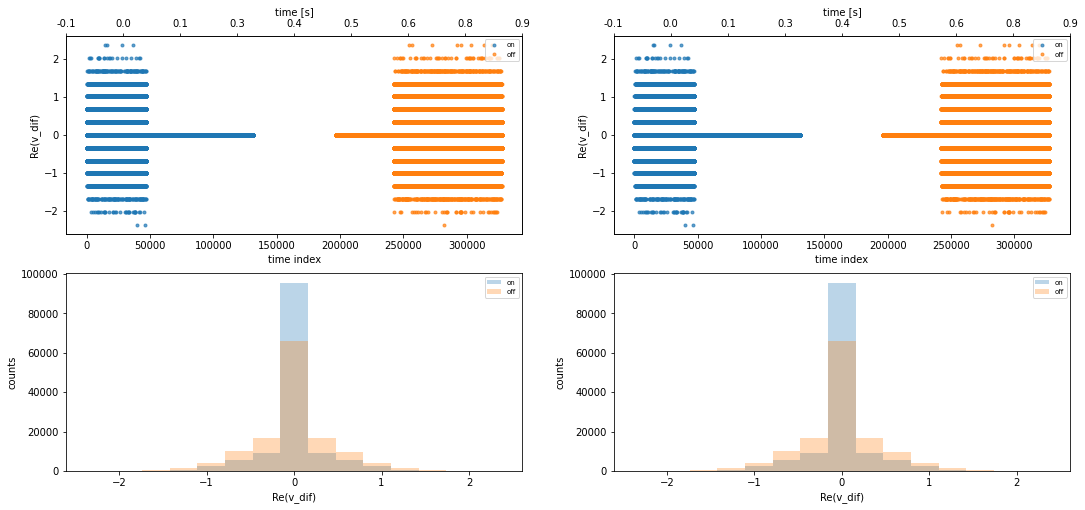

In [6]:
# plotting the histogram for single frequency bin 
fig,axes=subplots(nrows=2,ncols=2,figsize=(18,8))
fbin=713
for i in [0,1]:
    ax1=axes[0][i]
    ax2=axes[1][i]
    ax1.plot(np.arange(int(0*65536),int(2*65536)),np.real(dd[int(0*65536):int(2*65536),0,fbin]),'.',alpha=0.7,label='on')
    ax1.plot(np.arange(int(3*65536),int(5*65536)),np.real(dd[int(3*65536):int(5*65536),0,fbin]),'.',alpha=0.7,label='off')
    ax1.set_xlabel('time index')
    ax1.set_ylabel('Re(v_dif)')
    axx=ax1.twiny()
    axx.set_xlim(ax1.get_xlim())
    axx.set_xlabel('time [s]')
    axx.set_xticks(ax1.get_xticks()[:])
    axx.set_xticklabels(["{:.1f}".format((0.00000256*k))for k in ax1.get_xticks()[:]])
    ax2.hist(np.real(dd[int(0*65536):int(2*65536),0,fbin]),bins=15,alpha=0.3,label='on')
    ax2.hist(np.real(dd[int(3*65536):int(5*65536),0,fbin]),bins=15,alpha=0.3,label='off')
    ax2.set_ylabel('counts')
    ax2.set_xlabel('Re(v_dif)')
    for ax in [ax1,ax2]:
        ax.legend(loc=1,fontsize='x-small')

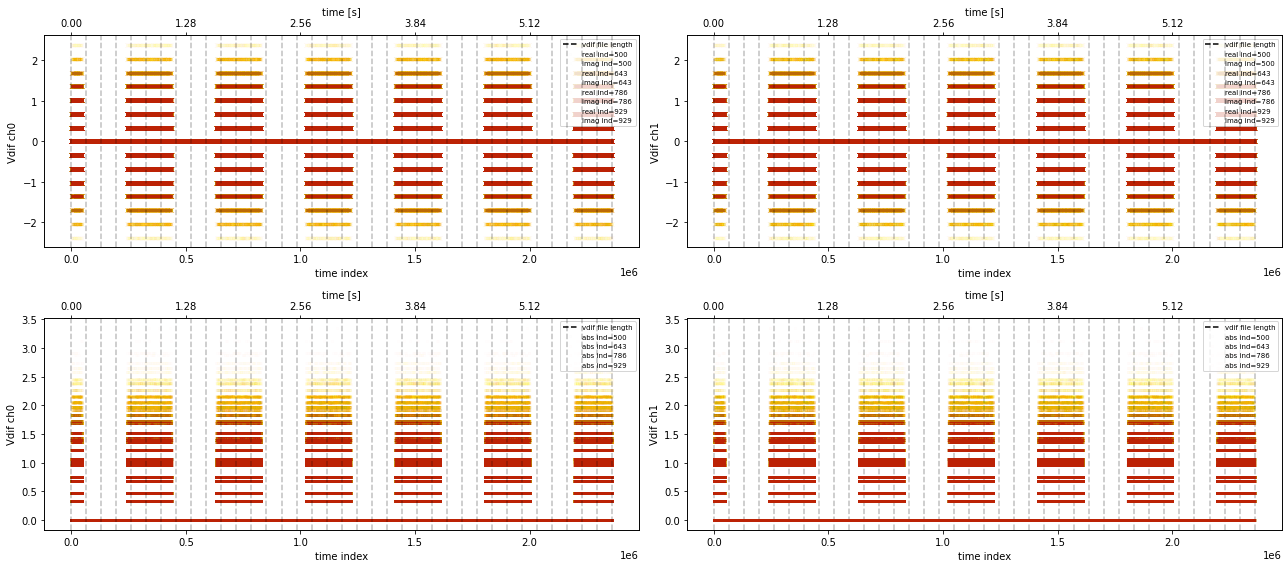

In [9]:
# plotting the time series of data  
fig,axes=subplots(nrows=2,ncols=2,figsize=(18,8))
colorsarr=cm.gnuplot2(np.linspace(0,1,1026))
#loop 1: i either channel 0 or 1 for auto/cross correlation product #1
for i in [0,1]:
    ax1=axes[0][i]
    ax2=axes[1][i]
    ax1.plot([],[],'k--',label='vdif file length')
    ax2.plot([],[],'k--',label='vdif file length')
    for k in np.arange(500,1024,143):
    #for k in [548,593,645]:
        ax1.plot(np.real(dd[:,i,k]),'.', alpha=0.0025, c=colorsarr[k],label='real ind={}'.format(k))
        ax1.plot(np.imag(dd[:,i,k]),'x', alpha=0.0025, c=colorsarr[k],label='imag ind={}'.format(k))
        ax2.plot(np.abs(dd[:,i,k]),'.', alpha=0.0025, c=colorsarr[k],label='abs ind={}'.format(k))
    for axi in [ax1,ax2]:
        [axvline(65536.0*fnum,c='k',linestyle='dashed',alpha=0.25) for fnum in np.arange(n_files+1)]
        axi.set_ylabel('Vdif ch{}'.format(i))
        axi.set_xlabel('time index')
        axi.legend(loc=1,fontsize='x-small')
        axx=axi.twiny()
        axx.set_xlim(axi.get_xlim())
        axx.set_xlabel('time [s]')
        axx.set_xticks(axi.get_xticks()[1:-1])
        axx.set_xticklabels(["{:.2f}".format(0.00000256*k)for k in axi.get_xticks()[1:-1]])
tight_layout()

In [ ]:
Plot_Correlations(dd,[548,593,645])
##Choose nice frequencies by looking at gain files

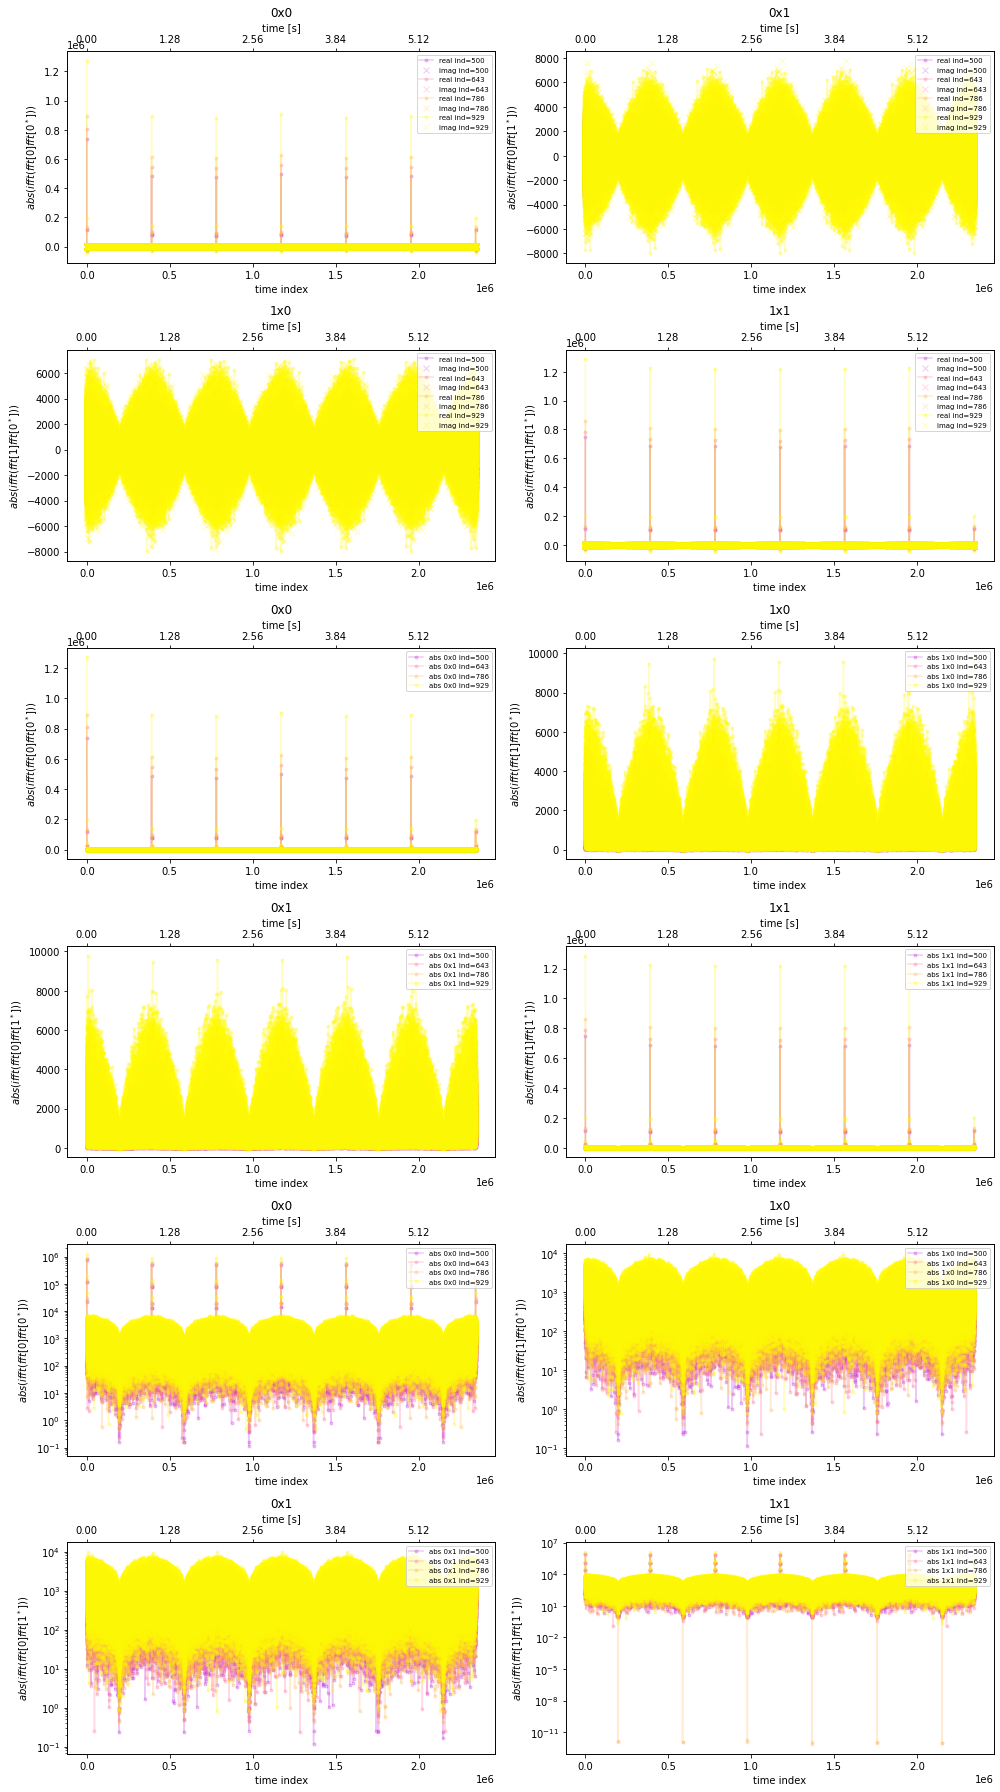

In [8]:
Plot_Correlations(dd, np.arange(500,1024,143))

In [ ]:
Plot_Correlations(dd,[713])

In [ ]:
# saving results in .npz arrays
tmin,tmax=[0,2343750] # 6 seconds
#tmin,tmax=[0,1953125] # 5 seconds 
f_bin=713
lag_spec00=np.abs(np.fft.ifft(np.fft.fft(dd[tmin:tmax,0,f_bin])*np.conj(np.fft.fft(dd[tmin:tmax,0,f_bin]))))
lag_spec01=np.abs(np.fft.ifft(np.fft.fft(dd[tmin:tmax,0,f_bin])*np.conj(np.fft.fft(dd[tmin:tmax,1,f_bin]))))
lag_spec10=np.abs(np.fft.ifft(np.fft.fft(dd[tmin:tmax,1,f_bin])*np.conj(np.fft.fft(dd[tmin:tmax,0,f_bin]))))
lag_spec11=np.abs(np.fft.ifft(np.fft.fft(dd[tmin:tmax,1,f_bin])*np.conj(np.fft.fft(dd[tmin:tmax,1,f_bin]))))
np.savez('/Users/kalyanibhopi94/Documents/kalyanib_dns/vdif_dns_plots/422Z...Feb29/lagspec.npz', lag_spec00=lag_spec00, lag_spec01=lag_spec01, lag_spec10=lag_spec10, lag_spec11=lag_spec11)

In [3]:
# load the saved result file
lag_spec=np.load('/Users/kalyanibhopi94/Documents/kalyanib_dns/vdif_dns_plots/934Z...Feb22/lagspec.npz')
print(lag_spec['lag_spec11'])

[1411770.32822312  218585.01741859   43683.64348809 ...    6711.07377436
   43683.64348809  218585.01741859]


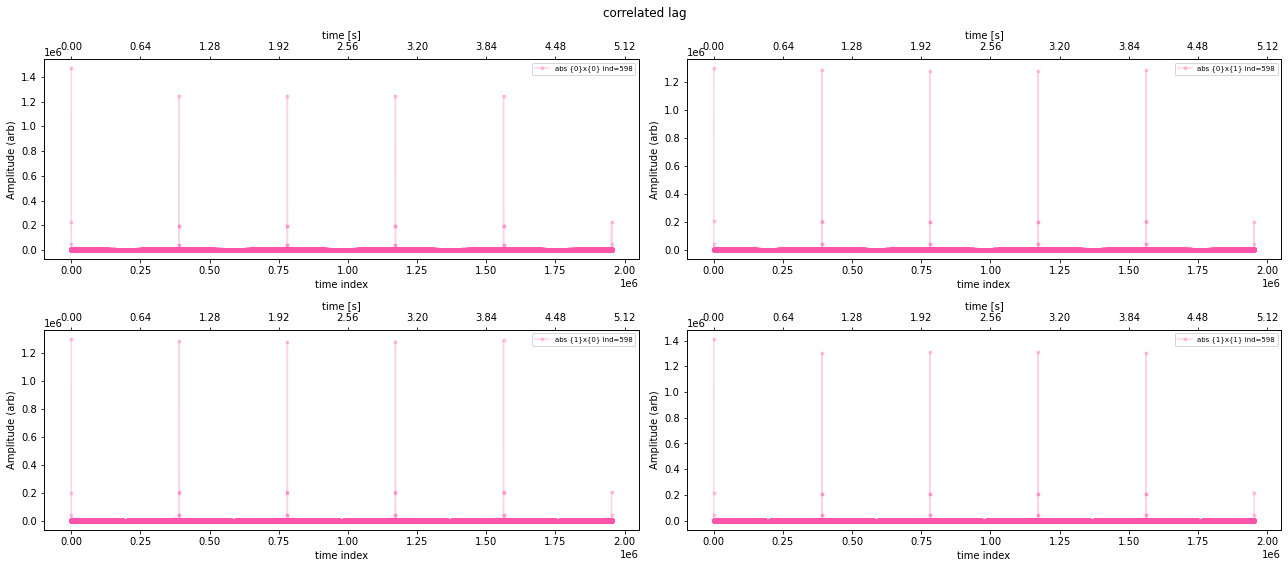

In [7]:
# plotting saved .npz results 
fig,axes=subplots(nrows=2,ncols=2,figsize=(18,8))
colorsarr=cm.gnuplot2(np.linspace(0,1,1026))
f_bin=598
ax1=axes[0][0]
ax1.plot(lag_spec['lag_spec00'],'.-',alpha=0.25,c=colorsarr[f_bin],label='abs {0}x{0} ind=598')
ax2=axes[0][1]
ax2.plot(lag_spec['lag_spec01'],'.-',alpha=0.25,c=colorsarr[f_bin],label='abs {0}x{1} ind=598')
ax3=axes[1][0]
ax3.plot(lag_spec['lag_spec10'],'.-',alpha=0.25,c=colorsarr[f_bin],label='abs {1}x{0} ind=598')
ax4=axes[1][1]
ax4.plot(lag_spec['lag_spec11'],'.-',alpha=0.25,c=colorsarr[f_bin],label='abs {1}x{1} ind=598') 
for axi in [ax1,ax2,ax3,ax4]:
    #axi.set_title('{}x{}'.format(i,j))
    axi.set_xlabel('time index')
    axi.set_ylabel('Amplitude (arb)')
    axi.legend(loc=1,fontsize='x-small')
    axx=axi.twiny()
    axx.set_xlim(axi.get_xlim())
    axx.set_xlabel('time [s]')
    axx.set_xticks(axi.get_xticks()[1:-1])
    axx.set_xticklabels(["{:.2f}".format(0.00000256*k)for k in axi.get_xticks()[1:-1]])
suptitle(f"correlated lag")
tight_layout()

In [ ]:
# Zooming on to first few time bins 
fig,axes=subplots(nrows=2,ncols=4,figsize=(18,8))
colorsarr=cm.gnuplot2(np.linspace(0,1,1026))
tmin,tmax=[0,16384]
#loop 1: i either channel 0 or 1 for auto/cross correlation product #1
for i in [0,1]:
    #loop 2: j either channel 0 or 1 for auto/cross correlation product #2
    for j in [0,1]:
        ax=axes[i][j]
        ax2=[axes[i][2],axes[i][3]][j]
        ax.set_title('{}x{}'.format(i,j))
        ax2.set_title('abs {}x{}'.format(i,j))
        #loop 3: k is the frequency bin we want to check... do the correlations and ffts here:
        for k in np.arange(10,1024,203):
            ax.plot(np.real(np.fft.ifft(np.fft.fft(dd[tmin:tmax,i,k])*np.conj(np.fft.fft(dd[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k],label='real ind={}'.format(k))
            ax.plot(np.imag(np.fft.ifft(np.fft.fft(dd[tmin:tmax,i,k])*np.conj(np.fft.fft(dd[tmin:tmax,j,k])))),'x',alpha=0.25,c=colorsarr[k],label='imag ind={}'.format(k))
            ax2.plot(np.abs(np.fft.ifft(np.fft.fft(dd[tmin:tmax,i,k])*np.conj(np.fft.fft(dd[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k],label='abs {}x{} ind={}'.format(i,j,k))
            ax.plot(-1.0*np.arange(0,tmax-tmin),np.real(np.fft.ifft(np.fft.fft(dd[tmin:tmax,i,k])*np.conj(np.fft.fft(dd[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k])
            ax.plot(-1.0*np.arange(0,tmax-tmin),np.imag(np.fft.ifft(np.fft.fft(dd[tmin:tmax,i,k])*np.conj(np.fft.fft(dd[tmin:tmax,j,k])))),'x',alpha=0.25,c=colorsarr[k])
            ax2.plot(-1.0*np.arange(0,tmax-tmin),np.abs(np.fft.ifft(np.fft.fft(dd[tmin:tmax,i,k])*np.conj(np.fft.fft(dd[tmin:tmax,j,k])))),'.-',alpha=0.25,c=colorsarr[k])
        ax.set_ylabel('$ifft(fft[{}]fft[{}^*])$'.format(i,j))
        ax.set_xlabel('time index')
        ax.legend(loc=1,fontsize='x-small')
        ax.set_xlim(-10,10)
        ax.axvline(0.0,c='k',alpha=0.25,linestyle='dashed')
        ax2.set_ylabel('$abs(ifft(fft[{}]fft[{}^*]))$'.format(i,j))
        ax2.set_xlabel('time index')
        ax2.legend(loc=1,fontsize='x-small')
        ax2.set_xlim(-10,10)
        ax2.axvline(0.0,c='k',alpha=0.25,linestyle='dashed')
        
        for axi in [ax,ax2]:
            axx=axi.twiny()
            axx.set_xlim(axi.get_xlim())
            axx.set_xlabel('time [$\mu$s]')      
            axx.set_xticks(axi.get_xticks()[:])
            axx.set_xticklabels(["{:.1f}".format((2.56*k))for k in axi.get_xticks()[:]])

tight_layout()

In [ ]:
0.390625*50

In [ ]:
# simulating repeating signal and plotting correlations
fakedat=np.zeros((1966080,2,1)).astype(np.complex64)
for i in [0,1]:
    fakedat[:,i,0]=np.tile((np.random.randn(65536)+1.0j*np.random.randn(65536)),30)
Plot_Correlations(fakedat,[0])